In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython.display import Image
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.utils import save_image
import random

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Oct 21 19:09:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    47W / 250W |   3895MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")
    
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

device = get_device()
device

device(type='cuda')

In [ ]:
########################################################################################

In [ ]:
#sound

In [ ]:
########################################################################################

In [ ]:
latent_size=100


In [ ]:
generator = nn.Sequential(
    #in: 128 x 1 x 1
    
    nn.ConvTranspose2d(latent_size, 1024, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(1024),
    nn.ReLU(True),
    #128 x 1024 x 4 x 4
    
    nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    #128 x 512 x 8 x 8
    
    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    #128 x 256 x 16 x 16
    
    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    #128 x 128 x 32 x 32
    
    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    #128 x 64 x 64 x 64
    
    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    #128 x 3 x 128 x 128
    nn.Tanh()
    
    
)
generator = to_device(generator, device)
generator.load_state_dict(torch.load("/content/gen-state-dict2"))

<All keys matched successfully>

In [ ]:
def image_push(sound_image):
    fake_images = generator(sound_image)
    
    return fake_images

In [ ]:
import random
letters = "As Prince Mohammed bin Salman said in his statement” The Saudis’ strength is like that of the Tuwaiq mountain, unbreakable, unless this mountain is leveled and equaled to the ground"

latent = [random.random() for _ in range(100)]
latent = [ord(letter) - 96 for letter in letters]
print(latent)
if len(latent) < 100:
  while len(latent)<100:
    latent.append(0)
elif len(latent) > 100:
  latent = latent[:100]
latent = torch.FloatTensor(latent)

print(latent)

[-31, 19, -64, -16, 18, 9, 14, 3, 5, -64, -19, 15, 8, 1, 13, 13, 5, 4, -64, 2, 9, 14, -64, -13, 1, 12, 13, 1, 14, -64, 19, 1, 9, 4, -64, 9, 14, -64, 8, 9, 19, -64, 19, 20, 1, 20, 5, 13, 5, 14, 20, 8125, -64, -12, 8, 5, -64, -13, 1, 21, 4, 9, 19, 8121, -64, 19, 20, 18, 5, 14, 7, 20, 8, -64, 9, 19, -64, 12, 9, 11, 5, -64, 20, 8, 1, 20, -64, 15, 6, -64, 20, 8, 5, -64, -12, 21, 23, 1, 9, 17, -64, 13, 15, 21, 14, 20, 1, 9, 14, -52, -64, 21, 14, 2, 18, 5, 1, 11, 1, 2, 12, 5, -52, -64, 21, 14, 12, 5, 19, 19, -64, 20, 8, 9, 19, -64, 13, 15, 21, 14, 20, 1, 9, 14, -64, 9, 19, -64, 12, 5, 22, 5, 12, 5, 4, -64, 1, 14, 4, -64, 5, 17, 21, 1, 12, 5, 4, -64, 20, 15, -64, 20, 8, 5, -64, 7, 18, 15, 21, 14, 4]
tensor([-3.1000e+01,  1.9000e+01, -6.4000e+01, -1.6000e+01,  1.8000e+01,
         9.0000e+00,  1.4000e+01,  3.0000e+00,  5.0000e+00, -6.4000e+01,
        -1.9000e+01,  1.5000e+01,  8.0000e+00,  1.0000e+00,  1.3000e+01,
         1.3000e+01,  5.0000e+00,  4.0000e+00, -6.4000e+01,  2.0000e+00,
       

In [ ]:
save_image(test_image, "style--.png")

In [ ]:
########################################################################################

In [ ]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.chosen_features = ["0", "5", "10", "19", "28"]
        self.model = models.vgg19(pretrained=True).features[:29]

    def forward(self, x):
        features = []
        for layer_num, layer in enumerate(self.model):
            x = layer(x)
            if str(layer_num) in self.chosen_features:
                features.append(x)
        return features


def load_image(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
imsize = 356

loader = transforms.Compose(
    [
        transforms.Resize((imsize, imsize)),
        transforms.ToTensor(),
    ]
)

original_img = load_image("/content/mbs3.jpeg")
style_img = load_image("/content/style.png")

generated = original_img.clone().requires_grad_(True)
model = VGG().to(device).eval()

total_steps = 4000
learning_rate = 0.001
alpha = 1
beta = 0.01
optimizer = optim.Adam([generated], lr=learning_rate)

for step in range(total_steps):
    generated_features = model(generated)
    original_img_features = model(original_img)
    style_features = model(style_img)

    style_loss = original_loss = 0

    for gen_feature, orig_feature, style_feature in zip(
        generated_features, original_img_features, style_features
    ):

        batch_size, channel, height, width = gen_feature.shape
        original_loss += torch.mean((gen_feature - orig_feature) ** 2)
        G = gen_feature.view(channel, height * width).mm(
            gen_feature.view(channel, height * width).t()
        )
        A = style_feature.view(channel, height * width).mm(
            style_feature.view(channel, height * width).t()
        )
        style_loss += torch.mean((G - A) ** 2)

    total_loss = alpha * original_loss + beta * style_loss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print(total_loss)
        save_image(generated, "generated.png")

tensor(4329382., device='cuda:0', grad_fn=<AddBackward0>)
tensor(260893.7031, device='cuda:0', grad_fn=<AddBackward0>)
tensor(115542.0547, device='cuda:0', grad_fn=<AddBackward0>)
tensor(72712.8828, device='cuda:0', grad_fn=<AddBackward0>)
tensor(51982.4688, device='cuda:0', grad_fn=<AddBackward0>)
tensor(40033.2383, device='cuda:0', grad_fn=<AddBackward0>)
tensor(32254.4414, device='cuda:0', grad_fn=<AddBackward0>)
tensor(26736.1953, device='cuda:0', grad_fn=<AddBackward0>)
tensor(22665.3496, device='cuda:0', grad_fn=<AddBackward0>)
tensor(19571.4199, device='cuda:0', grad_fn=<AddBackward0>)
tensor(17180.7578, device='cuda:0', grad_fn=<AddBackward0>)
tensor(15287.7168, device='cuda:0', grad_fn=<AddBackward0>)
tensor(13741.7549, device='cuda:0', grad_fn=<AddBackward0>)
tensor(12456.8574, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11370.5264, device='cuda:0', grad_fn=<AddBackward0>)
tensor(10433.2363, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9628.8838, device='cuda:0', grad_

In [ ]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.chosen_features = ["0", "5", "10", "19", "28"]
        self.model = models.vgg19(pretrained=True).features[:29]

    def forward(self, x):
        features = []
        for layer_num, layer in enumerate(self.model):
            x = layer(x)
            if str(layer_num) in self.chosen_features:
                features.append(x)
        return features


def load_image(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
imsize = 356

loader = transforms.Compose(
    [
        transforms.Resize((imsize, imsize)),
        transforms.ToTensor(),
    ]
)

original_img = load_image("/content/mbs3.jpeg")
style_img = load_image("/content/style0000.jpg")

generated = original_img.clone().requires_grad_(True)
model = VGG().to(device).eval()

total_steps = 4000
learning_rate = 0.001
alpha = 1
beta = 0.01
optimizer = optim.Adam([generated], lr=learning_rate)

for step in range(total_steps):
    generated_features = model(generated)
    original_img_features = model(original_img)
    style_features = model(style_img)

    style_loss = original_loss = 0

    for gen_feature, orig_feature, style_feature in zip(
        generated_features, original_img_features, style_features
    ):

        batch_size, channel, height, width = gen_feature.shape
        original_loss += torch.mean((gen_feature - orig_feature) ** 2)
        G = gen_feature.view(channel, height * width).mm(
            gen_feature.view(channel, height * width).t()
        )
        A = style_feature.view(channel, height * width).mm(
            style_feature.view(channel, height * width).t()
        )
        style_loss += torch.mean((G - A) ** 2)

    total_loss = alpha * original_loss + beta * style_loss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print(total_loss)
        save_image(generated, "generated_Ran.png")

tensor(328985.6250, device='cuda:0', grad_fn=<AddBackward0>)
tensor(47060.3281, device='cuda:0', grad_fn=<AddBackward0>)
tensor(34825.5273, device='cuda:0', grad_fn=<AddBackward0>)
tensor(29693.5273, device='cuda:0', grad_fn=<AddBackward0>)
tensor(26399.9746, device='cuda:0', grad_fn=<AddBackward0>)
tensor(23863.8848, device='cuda:0', grad_fn=<AddBackward0>)
tensor(21778.5820, device='cuda:0', grad_fn=<AddBackward0>)
tensor(19974.3594, device='cuda:0', grad_fn=<AddBackward0>)
tensor(18358.5352, device='cuda:0', grad_fn=<AddBackward0>)
tensor(16896.7422, device='cuda:0', grad_fn=<AddBackward0>)
tensor(15562.0898, device='cuda:0', grad_fn=<AddBackward0>)
tensor(14329.7266, device='cuda:0', grad_fn=<AddBackward0>)
tensor(13197.5078, device='cuda:0', grad_fn=<AddBackward0>)
tensor(12162.7979, device='cuda:0', grad_fn=<AddBackward0>)
tensor(11226.7305, device='cuda:0', grad_fn=<AddBackward0>)
tensor(10367.9854, device='cuda:0', grad_fn=<AddBackward0>)
tensor(9591.0332, device='cuda:0', grad

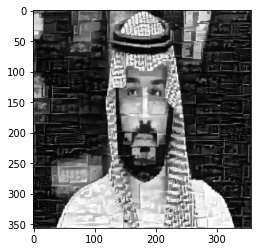

In [ ]:
import cv2
gan = cv2.imread('/content/generated.png', 0)
ran = cv2.imread('/content/generated_Ran.png', 0)

total = cv2.addWeighted(gan, 0.9, ran, 0.1, 0)
total = cv2.cvtColor(total,cv2.COLOR_BGR2RGB)
plt.imshow(total)